<a href="https://colab.research.google.com/github/jshankarrepo/A-Smartphone-Assistance-for-Blind-Visually-Impaired-using-Deep-Learning/blob/master/source%20code/A_Smartphone_assistance_for_Blind_Visually_Impaired_using_Deep_Learning_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Smartphone assistance for Blind & Visually Impaired using Deep Learning (Classification)**

Source Code Reference: 


*   https://github.com/RekhaChandrasekaran/DSND_Capstone_Dog_Breed_Classifier/blob/master/dog_app.ipynb
*   https://github.com/whimian/SVM-Image-Classification




## The Road Map

##### 1.   Environment Setup with Dataset 
##### 2.   Import Libraries and packages
##### 3.   SVM Model to Classify Direction
##### 4.   Apply Simple CNN Model
##### 5.   Apply NVIDIA's CNN Model
##### 6.   Apply CNN on Feature Engineered Data 

## 1.   Environment Setup with Dataset

### 1a. Install Tensorflow & patool (python unzipp)

In [0]:
!pip uninstall tensorflow -y

Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0


In [0]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 3.8MB 23.2MB/s 
     |████████████████████████████████| 450kB 42.8MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
!pip install patool

     |████████████████████████████████| 81kB 2.2MB/s 


### 1b.  Directory Clean Up and create required directories

In [0]:
!rm -rf /content/test_data/
!rm -rf /content/navigation_split_dataset/

In [0]:
!mkdir -p test_data
!mkdir -p navigation_split_dataset
!mkdir -p saved_models

### 1c. Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### 1d. Unzip test data for SVM which contains 1000 records of each direction (Left, Right & Center)

In [0]:
import patoolib
patoolib.extract_archive("/content/drive/My Drive/dataset_repo/test_data.rar", outdir="/content/test_data")

patool: Extracting /content/drive/My Drive/dataset_repo/test_data.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/dataset_repo/test_data.rar"
patool:     with cwd='/content/test_data'
patool: ... /content/drive/My Drive/dataset_repo/test_data.rar extracted to `/content/test_data'.


'/content/test_data'

## 2. Import Libraries and packages

### 2a.  Import libraries

In [0]:
from glob import glob
import random
random.seed(867005309)
import pandas as pd
import cv2 
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imgaug import augmenters as iaa

from skimage.transform import resize
from sklearn.datasets import load_files  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.utils import np_utils

import tensorflow as tf
from tensorflow import keras
from skimage.io import imread
from keras.callbacks import ModelCheckpoint  
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

%matplotlib inline 

## 3.   SVM Model to Classify Direction


### 3a.  Load Data function

In [0]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = 'An Image Classification'
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)


### 3b.  Invoke load Image data function

In [0]:
# image_dataset = load_image_files("/content/test_data")

### 3c. Split Images and Direction into Training and Test set

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(
#     image_dataset.data, image_dataset.target, test_size=0.3,random_state=109)

### 3d. SVM Model Configuration

In [0]:
# param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]
# svc = svm.SVC()
# clf = GridSearchCV(svc, param_grid)


### 3e. Fit the model

In [0]:
# clf.fit(X_train, y_train)

###3f. Predict using Test dataset

In [0]:
# y_pred = clf.predict(X_test)

###3g. Print the Accuracy

In [0]:
# print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(y_test, y_pred)))

## 4.   Apply CNN Model

### 4a. Unzip the dataset from the Drive

In [0]:
import patoolib
patoolib.extract_archive("/content/drive/My Drive/dataset_repo/navigation_split_dataset.rar", outdir="/content/navigation_split_dataset")

patool: Extracting /content/drive/My Drive/dataset_repo/navigation_split_dataset.rar ...
patool: running /usr/bin/unrar x -- "/content/drive/My Drive/dataset_repo/navigation_split_dataset.rar"
patool:     with cwd='/content/navigation_split_dataset'
patool: ... /content/drive/My Drive/dataset_repo/navigation_split_dataset.rar extracted to `/content/navigation_split_dataset'.


'/content/navigation_split_dataset'

### 4b. Load the dataset and Split into Training, Test and Validation set

In [0]:
def load_dataset(path):
    data = load_files(path)
    direction_files = np.array(data['filenames'])
    target_direction = np_utils.to_categorical(np.array(data['target']), 3)
    return direction_files, target_direction

# load train, test, and validation datasets
train_files, train_targets = load_dataset('navigation_split_dataset/train')
valid_files, valid_targets = load_dataset('navigation_split_dataset/valid')
test_files, test_targets = load_dataset('navigation_split_dataset/test')

print('There are %s total direction images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training images.' % len(train_files))
print('There are %d validation images.' % len(valid_files))
print('There are %d test images.'% len(test_files))

There are 15143 total direction images.

There are 9084 training images.
There are 1515 validation images.
There are 4544 test images.


4c. Plot the Direction (Left, Right, Center) data 

In [0]:
folder_names = []
num_images = []

for folder in sorted(glob("navigation_split_dataset/train/*/")):
    folder_names.append(folder[20:-1])
    num_images.append(len(folder))
    
dogs_df = pd.DataFrame()
dogs_df['dog_breed'] = folder_names
dogs_df['num_images'] = num_images

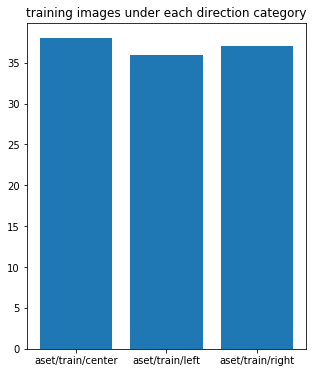

In [0]:
plt.figure(figsize=(5,6))
plt.bar(folder_names, num_images)
plt.title('training images under each direction category')
plt.show()

### 4d. Print random Images

In [0]:
def img_show(index):
    img_path = train_files[index]
    img = image.load_img(img_path)
    return img

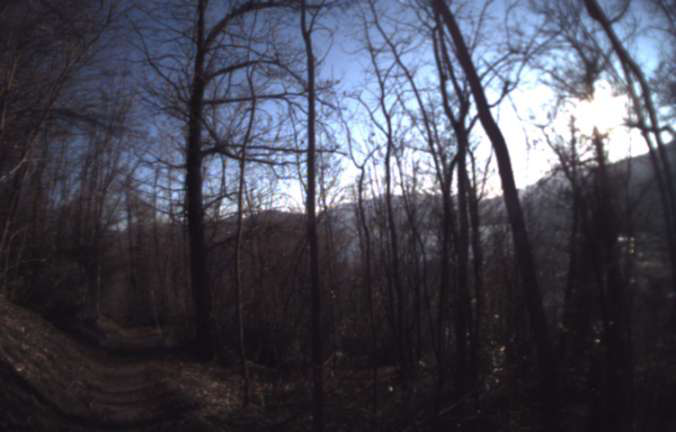

In [0]:
img_show(10)

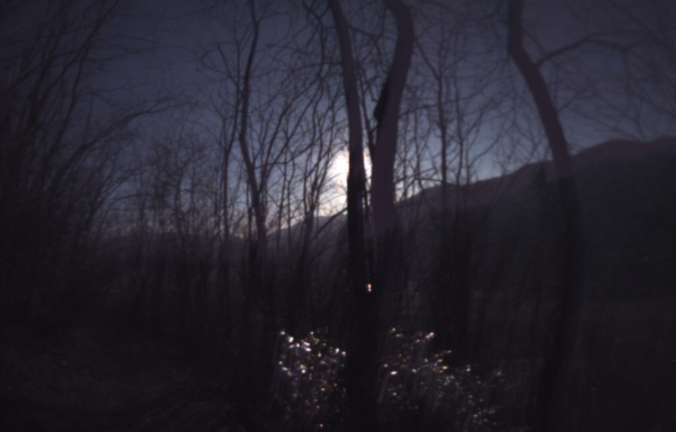

In [0]:
img_show(20)

### 4e. Convert the images from 3D Tensor to 4D Tensor Shape (1, 224, 224, 3)

In [0]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### 4f. Pre-process thedata for keras

In [0]:
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 4544/4544 [00:39<00:00, 113.88it/s]


### 4g. Simple CNN model

In [0]:
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3, 20), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 20), strides=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 20), strides=(2,2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(3, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 102, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 108, 100, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 41, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 39, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 10, 32)        0         
_________________________________________

### 4h. Compile the model using rmsprop optimizer with categorical crossentropy

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

4i. Fit the model

In [0]:
from keras.callbacks import ModelCheckpoint  

epochs = 10

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

basic_model_history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)
 

Train on 9084 samples, validate on 1515 samples
Epoch 1/5
9080/9084 [============================>.] - ETA: 0s - loss: 1.0285 - acc: 0.4607
Epoch 00001: val_loss improved from inf to 1.25945, saving model to saved_models/weights.best.from_scratch.hdf5
9084/9084 [==============================] - 16s 2ms/sample - loss: 1.0283 - acc: 0.4608 - val_loss: 1.2595 - val_acc: 0.3875
Epoch 2/5
9080/9084 [============================>.] - ETA: 0s - loss: 0.8842 - acc: 0.6102
Epoch 00002: val_loss improved from 1.25945 to 1.00397, saving model to saved_models/weights.best.from_scratch.hdf5
9084/9084 [==============================] - 9s 997us/sample - loss: 0.8841 - acc: 0.6102 - val_loss: 1.0040 - val_acc: 0.5637
Epoch 3/5
9080/9084 [============================>.] - ETA: 0s - loss: 0.7936 - acc: 0.6615
Epoch 00003: val_loss improved from 1.00397 to 0.76165, saving model to saved_models/weights.best.from_scratch.hdf5
9084/9084 [==============================] - 9s 996us/sample - loss: 0.7935 - a

In [0]:
optimizer = Adam(lr=1e-3)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
epochs = 10

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

basic_adam_model_history = model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 9084 samples, validate on 1515 samples
Epoch 1/10
9080/9084 [============================>.] - ETA: 0s - loss: 0.3884 - acc: 0.8541
Epoch 00001: val_loss improved from inf to 0.47852, saving model to saved_models/weights.best.from_scratch.hdf5
9084/9084 [==============================] - 9s 986us/sample - loss: 0.3882 - acc: 0.8541 - val_loss: 0.4785 - val_acc: 0.8337
Epoch 2/10
9040/9084 [============================>.] - ETA: 0s - loss: 0.3770 - acc: 0.8552
Epoch 00002: val_loss improved from 0.47852 to 0.43872, saving model to saved_models/weights.best.from_scratch.hdf5
9084/9084 [==============================] - 9s 981us/sample - loss: 0.3762 - acc: 0.8554 - val_loss: 0.4387 - val_acc: 0.8079
Epoch 3/10
9040/9084 [============================>.] - ETA: 0s - loss: 0.3603 - acc: 0.8652
Epoch 00003: val_loss improved from 0.43872 to 0.35799, saving model to saved_models/weights.best.from_scratch.hdf5
9084/9084 [==============================] - 9s 983us/sample - loss: 0.3613

Text(0.5, 0, 'Epoch')

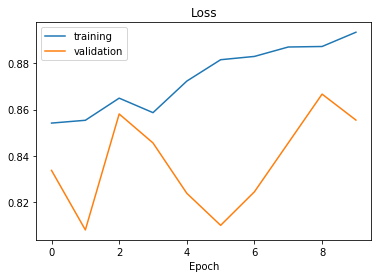

In [0]:
plt.plot(basic_adam_model_history.history['acc'])
plt.plot(basic_adam_model_history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')


Text(0.5, 0, 'Epoch')

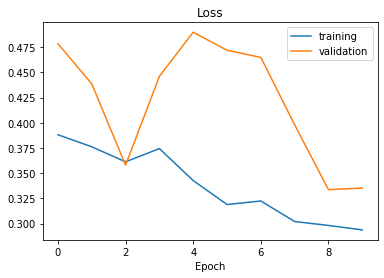

In [0]:
plt.plot(basic_adam_model_history.history['loss'])
plt.plot(basic_adam_model_history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

### 4j. Test the Accuracy

In [0]:
# get index of predicted direction for each image in test set
direction_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(direction_predictions)==np.argmax(test_targets, axis=1))/len(direction_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 82.6144%


## 5.   Apply NVIDIA's CNN Model

### 5a. NVIDIA Model function

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, (5, 5), input_shape=(224, 224, 3), activation='elu'))
  model.add(Conv2D(36, (5, 5), activation='elu'))
  model.add(Conv2D(48, (5, 5), activation='elu'))
  model.add(Conv2D(64, (3, 3), activation='elu'))
  
  model.add(Conv2D(64, (3, 3), activation='elu'))
  model.add(Dropout(0.5))
 
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))
 
  model.add(Dense(3, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


### 5b. Build the model

In [0]:
nvidia_model = nvidia_model()
nvidia_model.summary()

### 5c. Fit the model

In [0]:
nvidia_model.fit(train_tensors, train_targets, validation_data=(valid_tensors, valid_targets), epochs=10, batch_size=128, verbose=1)

5d. Evaluate the accuracy

In [0]:
loss, accuracy = nvidia_model.evaluate(test_tensors, test_targets, verbose=1)
print('val accuracy: {}'.format(accuracy))

## 6.   Apply CNN on Feature Engineered Data 

### 6a. Random Flip

In [0]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

In [0]:
random_index = random.randint(0, 1000)
image = train_files[random_index]
direction = train_targets[random_index]
original_image = mpimg.imread(image)
flipped_image, flipped_direction = img_random_flip(original_image, direction)
 
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Direction:' + str(direction))
axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Direction:' + str(flipped_direction))


### 6b. Zoom an Image function and plot original and zoomed Image

In [0]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

In [0]:
image = train_files[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')



### 6c. Panning an Image 

In [0]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image


### 6d.  Random Increase Image brightness

In [0]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image


### 6e. Random Augmentation

In [0]:
def random_augment(image, direction):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, direction = img_random_flip(image, direction)
    
    return image, direction



In [0]:
ncol = 2
nrow = 10
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(train_files) - 1)
  random_image = train_files[randnum]
  random_steering = train_targets[randnum]
    
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)
    
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")



### 6f. Image Preprocessing: Color, Smoothing and Resize

In [0]:
def img_preprocess(img):
    # img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (224, 224))
    img = img/255
    return img
image = train_files[200]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)


In [0]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

### 6g.  Batch Generator

In [0]:
def batch_generator(image_paths, direction, batch_size, istraining):
  while True:
    batch_img = []
    batch_steering = []
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        im, steering = random_augment(image_paths[random_index], direction[random_index])
     
      else:
        im = mpimg.imread(image_paths[random_index])
        steering = direction[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering)) 

In [0]:
x_train_gen, y_train_gen = next(batch_generator(train_files, train_targets, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(valid_files, valid_targets, 1, 0))

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
 
axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')
 
axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')


In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Conv2D(24, (5, 5), input_shape=(224, 224, 3), activation='elu'))
  model.add(Conv2D(36, (5, 5), activation='elu'))
  model.add(Conv2D(48, (5, 5), activation='elu'))
  model.add(Conv2D(64, (3, 3), activation='elu'))
  
  model.add(Conv2D(64, (3, 3), activation='elu'))
  model.add(Dropout(0.5))
 
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  model.add(Dropout(0.5))
 
  model.add(Dense(3, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


In [0]:
nvidia_model_v2 = nvidia_model()
nvidia_model_v2.summary()

In [0]:
history = nvidia_model_v2.fit_generator(batch_generator(train_files, train_targets, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=10,
                                  validation_data=batch_generator(valid_files, valid_targets, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)


In [0]:
loss, accuracy = nvidia_model_v2.evaluate(test_tensors, test_targets, verbose=1)
print('val accuracy: {}'.format(accuracy))